# Part I - Ford GoBike System Data
## by Luke Confait

## Introduction
Ford GoBike, which is currently called Bay Wheels and owned by lyft, is a Bike sharing service operating in the greater San Francisco Bay area. The data set is comprised of 183412 bike trips undertaken in February 2019.


> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [76]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from geopy import distance, Point

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [77]:
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

Taking a look at the overall structure of the dataset

In [78]:
print(bike_data.shape)


(183412, 16)


In [79]:
bike_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [80]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [81]:
bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [82]:
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


I have decided to perform some initial data cleaning to assist in creating visualisations

In [83]:
print(bike_data['end_station_name'].nunique())
print(bike_data['start_station_name'].nunique())

329
329


There are 329 stations, since this is a large number it will make for difficult to interpret visualisations and so this feature will not be investigated.

Make a Copy for data cleaning.

In [84]:
bike_data_copy = bike_data.copy()

Rows are dropped where __'member_birth_year'__ is null. This also deals with Null values in the __'member_gender'__ column.

In [85]:
bike_data_copy.dropna(subset=['member_birth_year'],inplace=True)

In [86]:
bike_data_copy.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           195
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id             195
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
dtype: int64

There are some problematic birth years that dont make sense as the users could not be that old. We can limit the dataset to users born after 1940.

In [87]:
bike_data_copy = bike_data_copy[bike_data_copy['member_birth_year'] > 1940]

In [88]:
bike_data_copy['member_birth_year'].value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1943.0       30
1942.0       21
1946.0       19
1941.0        9
1944.0        2
Name: member_birth_year, Length: 61, dtype: int64

The time and hour for start and end is put into seperate columns.

In [89]:
bike_data_copy['start_date'] = pd.to_datetime(bike_data_copy.start_time).dt.date
bike_data_copy['start_hour'] = pd.to_datetime(bike_data_copy.start_time).dt.hour

bike_data_copy['end_date'] = pd.to_datetime(bike_data_copy.end_time).dt.date
bike_data_copy['end_hour'] = pd.to_datetime(bike_data_copy.end_time).dt.hour


Print the min and max __'start_date'__ to determine the period of data collection.

In [90]:
print(min(pd.to_datetime(bike_data_copy['start_date'])))
print(max(pd.to_datetime(bike_data_copy['start_date'])))

2019-02-01 00:00:00
2019-02-28 00:00:00


In [91]:
print(bike_data_copy['start_hour'].sample(1))
print(bike_data_copy['end_hour'].sample(1))

135287    14
Name: start_hour, dtype: int64
4571    15
Name: end_hour, dtype: int64


It would be useful to have a **'start_day_of_week'** feature for analysis.

In [92]:
bike_data_copy['start_day_of_week'] = pd.to_datetime(bike_data_copy['start_date']).dt.day_name()

It would interesting to see if the trips were between 2 different station or if the trip ended at the same place.

In [93]:
bike_data_copy['same_end_and_start_station'] = bike_data_copy['start_station_id'] == bike_data_copy['end_station_id']
bike_data_copy['same_end_and_start_station'].value_counts()

False    171488
True       3456
Name: same_end_and_start_station, dtype: int64

In 3458 trips the trip ended at the station it started at so distance as the crow files will be 0 as from this dataset the distance can only be calculated from the latitude and longitude of the start and end stations.

The straight line distance between the start and end stations be engineered from the longitude and latitudes of the start and end stations. This stackoverflow [post](https://stackoverflow.com/questions/55909305/using-geopy-in-a-dataframe-to-get-distances) proved useful in figuring out how to implement this.

In [94]:
# Use geopy to get the start and end points of each trip
bike_data_copy['start_point'] = bike_data_copy.apply(
    lambda x: Point(latitude=x['start_station_latitude'], longitude=x['start_station_longitude']),
    axis=1)
bike_data_copy['end_point'] = bike_data_copy.apply(
    lambda x: Point(latitude=x['end_station_latitude'], longitude=x['start_station_longitude']),
    axis=1)
    
bike_data_copy['start_point'].sample(5)

141368    37 47m 29.2704s N, 122 23m 27.7224s W
155800    37 45m 41.8835s N, 122 23m 26.3317s W
49448     37 46m 28.2734s N, 122 24m 34.0177s W
111566      37 46m 51.635s N, 122 24m 20.398s W
102232     37 47m 50.208s N, 122 23m 54.3696s W
Name: start_point, dtype: object

In [95]:
# use the geopy distance method to get the distance between the start and end points
bike_data_copy['distance_km'] = bike_data_copy.apply(lambda x: distance.distance(x['start_point'],x['end_point']).km,axis=1)

Drop columns that wont be analysed or are no longer needed

In [96]:
bike_data_copy.drop(['bike_id','start_point','end_point','start_station_id','start_station_name','end_station_id','end_station_name'],axis=1,inplace=True)

In [97]:
bike_data_copy.shape

(174944, 18)

There are a number of columns that have categorical values and so the data type should be changed to reflect this.

In [98]:
bike_data_copy['user_type'].value_counts()

Subscriber    158326
Customer       16618
Name: user_type, dtype: int64

In [99]:
bike_data_copy['member_gender'].value_counts()

Male      130491
Female     40804
Other       3649
Name: member_gender, dtype: int64

In [100]:
bike_data_copy['bike_share_for_all_trip'].value_counts()

No     157639
Yes     17305
Name: bike_share_for_all_trip, dtype: int64

In [101]:
bike_data_copy['user_type'] = bike_data_copy['user_type'].astype('category')
bike_data_copy['member_gender'] = bike_data_copy['member_gender'].astype('category')
bike_data_copy['bike_share_for_all_trip'] = bike_data_copy['bike_share_for_all_trip'].astype('category')

In [102]:
bike_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174944 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec                  174944 non-null int64
start_time                    174944 non-null object
end_time                      174944 non-null object
start_station_latitude        174944 non-null float64
start_station_longitude       174944 non-null float64
end_station_latitude          174944 non-null float64
end_station_longitude         174944 non-null float64
user_type                     174944 non-null category
member_birth_year             174944 non-null float64
member_gender                 174944 non-null category
bike_share_for_all_trip       174944 non-null category
start_date                    174944 non-null object
start_hour                    174944 non-null int64
end_date                      174944 non-null object
end_hour                      174944 non-null int64
start_day_of_week             174944 non-null object
same_end_and_start_station    174

In [103]:
bike_data_copy.to_csv('FordGoBike_final.csv',index=False)

In [104]:
bike_data_analysis = pd.read_csv('FordGoBike_final.csv')

In [105]:
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
cat_type = pd.api.types.CategoricalDtype(week_order,ordered=True)
bike_data_analysis['start_day_of_week'] = bike_data_analysis['start_day_of_week'].astype(cat_type)
bike_data_analysis['start_day_of_week']

0         Thursday
1         Thursday
2         Thursday
3         Thursday
4         Thursday
            ...   
174939      Friday
174940      Friday
174941      Friday
174942      Friday
174943      Friday
Name: start_day_of_week, Length: 174944, dtype: category
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

### What is the structure of your dataset?

The cleaned dataset contains 174944 entries with 16 features.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are the duration of the trip (duration_sec), start time and date of the trip and the distance (distance_km) between the end and start station

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The effect of the above mentioned features on each other will help to determine the times and day of month (weekdays will also be considered) with the longest trips. Categorical variables such as user_type, member_birth_year and member_gender will allow for comparisons to be drawn about how different categories of people use the service.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [106]:
#Set a base color for plots to use
base_color = sb.color_palette()[1]

### Trip Duration
The trip duration variable is the most important variable for comparing trips in the dataset so the investigation can start with its distribution.

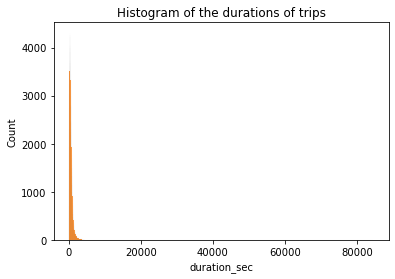

In [107]:
sb.histplot(data=bike_data_analysis, x='duration_sec',color=base_color);
plt.title('Histogram of the durations of trips');

Most of the points are clustered at the lower end and the count drops off quickly, there are also a small number of extremely long durations. A logarithmic scale would be more suitable in displaying the distribution.

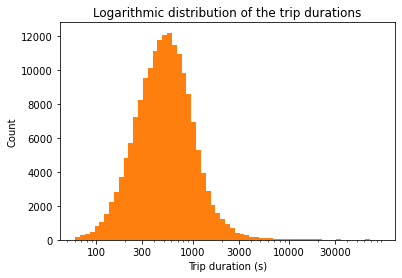

In [108]:
min_duration = bike_data_analysis['duration_sec'].min()
max_duration = bike_data_analysis['duration_sec'].max()

ticks = [ 100, 300, 1000, 3000, 10000, 30000]

bins = 10 ** np.arange(np.log10(min_duration),np.log10(max_duration)+0.05,0.05)
plt.hist(data=bike_data_copy,x='duration_sec',bins=bins,color=base_color);
plt.xscale('log')
plt.xticks(ticks,ticks)
plt.xlabel('Trip duration (s)')
plt.ylabel('Count')
plt.title('Logarithmic distribution of the trip durations');

The data is unimodal and centred around 500 seconds , which is about 8 minutes, after being logarithmically tranformed. The trip duration also appears to be normally distributed after the transformation.

Since there are only a small number of really long trips it could be a good idea to remove outliers by limiting the trip duration to within 2.5 times the inter-quartile range

In [109]:
q25 = bike_data_analysis['duration_sec'].quantile(0.25)
q75 = bike_data_analysis['duration_sec'].quantile(0.75)
iqr = q75 - q25
bike_data_analysis = bike_data_analysis.drop(
    bike_data_analysis[(bike_data_analysis.duration_sec <= q25 - 2.5*iqr) | (bike_data_analysis.duration_sec >= q75 + 2.5*iqr)].index)



Plotting the logarithmic scale plot again.

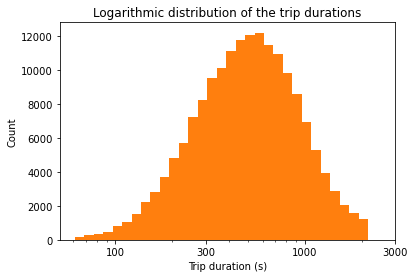

In [110]:
min_duration = bike_data_analysis['duration_sec'].min()
max_duration = bike_data_analysis['duration_sec'].max()

ticks = [100, 300, 1000, 3000]

bins = 10 ** np.arange(np.log10(min_duration),np.log10(max_duration)+0.05,0.05)
plt.hist(data=bike_data_copy,x='duration_sec',bins=bins,color=base_color);
plt.xscale('log')
plt.xticks(ticks,ticks)
plt.xlabel('Trip duration (s)')
plt.ylabel('Count')
plt.title('Logarithmic distribution of the trip durations');

### Start date
The start date of the trips can be useful to see how usage varies over the month.

Text(0.5, 0, 'Day of month')

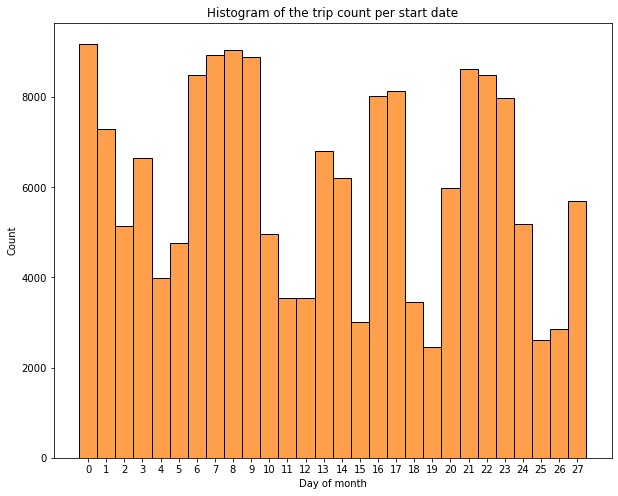

In [111]:
plt.figure(figsize=[10,8])
g = sb.histplot(data=bike_data_analysis,x='start_date',color=base_color)
ticks = [i for i in range(28)]

plt.xticks(ticks,ticks);
plt.title('Histogram of the trip count per start date');
plt.xlabel('Day of month')


While the days with more trips can be easily seen it would be more informative to see which days of the week had a greater trip count than others.

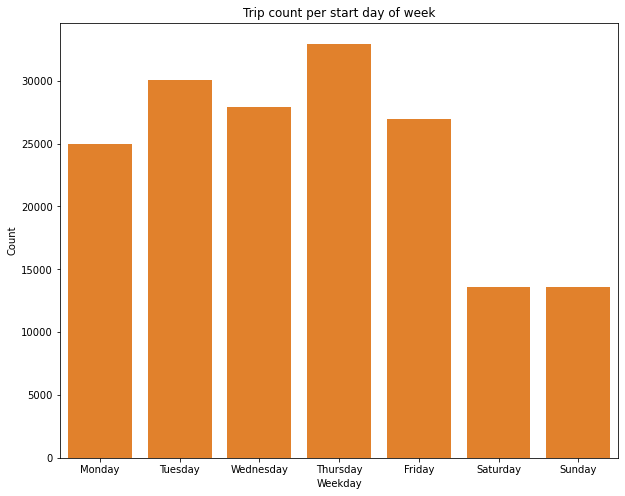

In [112]:
plt.figure(figsize=[10,8])

sb.countplot(data=bike_data_analysis, x='start_day_of_week',color=base_color)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Trip count per start day of week');

Saturday and Sunday have the lowest trip count and Thursday the highest trip count. Work related trips only occuring during the week could explain this discrepancy.

### Distance
The distribution of the distance between the start and end stations can be used to roughly gauge how far the users travelled on their trips. However from the data in the dataset only the distance as the crow flies can be determined.

Text(0.5, 1.0, 'Histogram of distance between start and end stations')

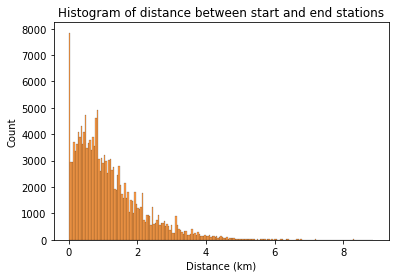

In [113]:
sb.histplot(data=bike_data_analysis,x='distance_km',color=base_color)
plt.xlabel('Distance (km)')
plt.title('Histogram of distance between start and end stations')

Once again the values are clustered at the low end and drop off quickly with some very long distances. A logarithmic distribution can be used to give more insight.

In [114]:
# Check how many trips ended where they started
print(sum(bike_data_analysis['same_end_and_start_station']))
percent = sum(bike_data_analysis['same_end_and_start_station'])/bike_data_analysis.count()[1]*100
print(f'{percent:.2f} % of trips ended where they started.')

2587
1.52 % of trips ended where they started.


3458 trips ended at the station where they started and the distance from start to end station is 0 in these cases.

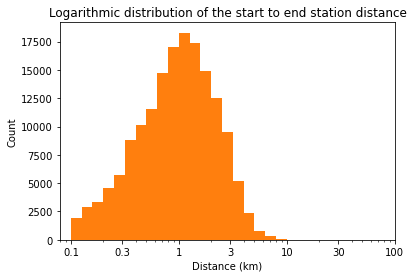

In [115]:
min_distance = 0.1 # Cant use 0 as min due to the logarithmic transformation
max_distance = bike_data_analysis['distance_km'].max()

ticks = [0.1,0.3,1,3,10,30,100]

bins = 10 ** np.arange(np.log10(min_distance),np.log10(max_distance)+0.1,0.1)
plt.hist(data=bike_data_copy,x='distance_km',bins=bins,color=base_color);
plt.xscale('log')
plt.xticks(ticks,ticks)
plt.xlabel('Distance (km)')
plt.ylabel('Count')
plt.title('Logarithmic distribution of the start to end station distance');


The distribution is unimodal around about 1km distance from the start to end station.

### Time of day
The distribution of the times when the trips started can be used to see when the service is in the most demand.

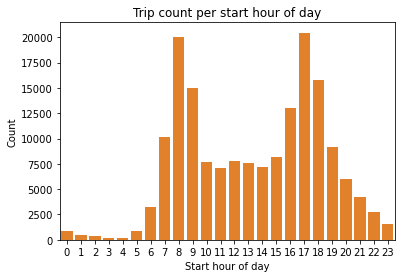

In [116]:
sb.countplot(data=bike_data_analysis, x='start_hour',color=base_color)
plt.xlabel('Start hour of day')
plt.ylabel('Count')
plt.title('Trip count per start hour of day');

The data is bimodal peaking at 8:00 and 17:00 which could correspond to when users will be going to or coming home from work. The trip count is also fairly consistent between these 2 times.

### User type

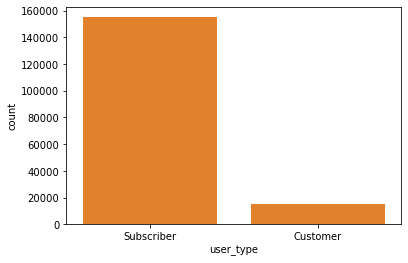

In [117]:
sb.countplot(data=bike_data_analysis,x='user_type',color=base_color);

### User birth year

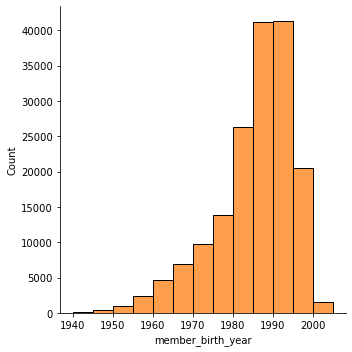

In [118]:
bin_edges = [x for x in range(1940,2010,5)]
sb.displot(data=bike_data_analysis,x='member_birth_year',bins=bin_edges,color=base_color);

### Member gender

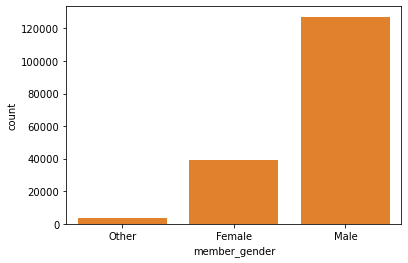

In [119]:
sb.countplot(data=bike_data_analysis,x='member_gender',order=['Other','Female','Male'],color=base_color);



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [120]:
categoric_vars = ['user_type','member_gender','bike_share_for_all_trip','same_end_and_start_station']
numeric_vars = ['duration_sec', 'member_birth_year','distance_km']

A correlation matrix can be used to see if there is any correlation between 

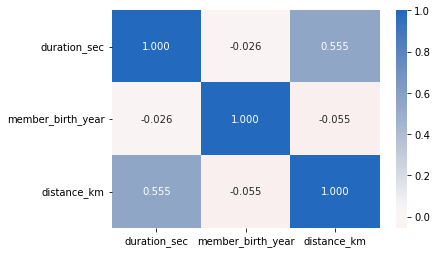

In [121]:
sb.heatmap(bike_data_analysis[numeric_vars].corr(),annot=True,fmt = '.3f',cmap='vlag_r',center=0);

There is only some correlation between duration_sec and distance_km which makes sense as it would take longer to travel a further distance a scatterplot can be plotted to see what this looks like.

<AxesSubplot:xlabel='distance_km', ylabel='duration_sec'>

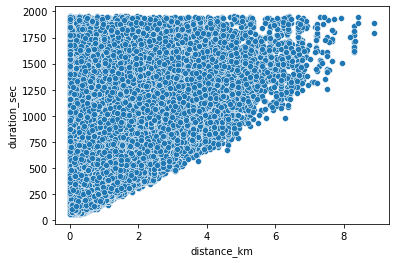

In [122]:
sb.scatterplot(data=bike_data_analysis,x='distance_km',y='duration_sec')


The plot shows that there appears to be a minimum time to travel a certain distance. However the time taken could be anything greater than this minimum which could be explained by the distance only being between the start and end station and not allowing for where the trips actually went.

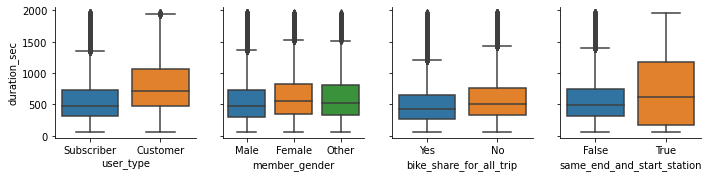

In [123]:
g = sb.PairGrid(data=bike_data_analysis, y_vars=['duration_sec'], x_vars = categoric_vars)
g.map(sb.boxplot)

<AxesSubplot:xlabel='user_type', ylabel='duration_sec'>

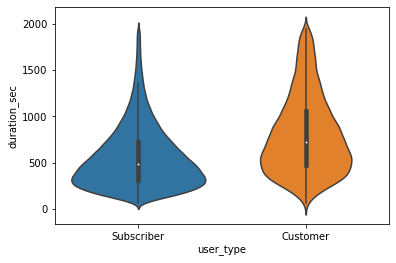

In [124]:
sb.violinplot(data=bike_data_analysis,x='user_type',y='duration_sec')

<AxesSubplot:xlabel='user_type', ylabel='distance_km'>

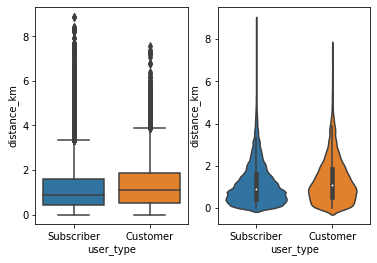

In [125]:
fig, axes = plt.subplots(1,2)

sb.boxplot(data=bike_data_analysis,x='user_type',y='distance_km',ax=axes[0])
sb.violinplot(data=bike_data_analysis,x='user_type',y='distance_km',ax=axes[1])

In [126]:
bike_data_analysis['log_duration'] = bike_data_analysis['duration_sec'].apply(lambda x: np.log10(x))

<AxesSubplot:xlabel='member_gender', ylabel='count'>

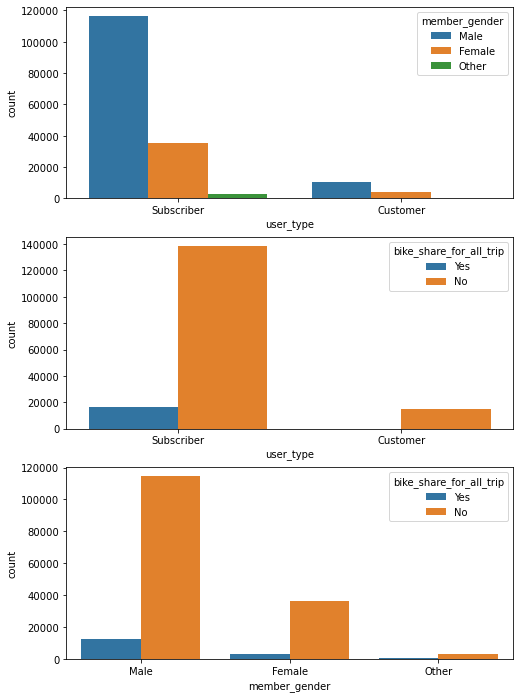

In [127]:
plt.figure(figsize=[8,12])
plt.subplot(3,1,1)
sb.countplot(data=bike_data_analysis,x='user_type',hue='member_gender')
plt.subplot(3,1,2)
sb.countplot(data=bike_data_analysis,x='user_type',hue='bike_share_for_all_trip')
plt.subplot(3,1,3)
sb.countplot(data=bike_data_analysis,x='member_gender',hue='bike_share_for_all_trip')


<AxesSubplot:xlabel='user_type', ylabel='member_birth_year'>

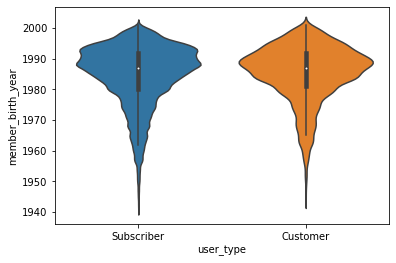

In [128]:
sb.violinplot(data=bike_data_analysis,x='user_type',y='member_birth_year',)


<AxesSubplot:xlabel='member_birth_year', ylabel='Count'>

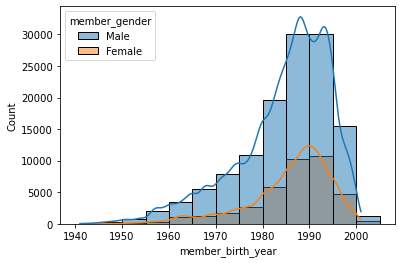

In [129]:
sb.histplot(data=bike_data_analysis[bike_data_analysis['member_gender'] != 'Other'],x='member_birth_year', hue='member_gender', bins=bin_edges, kde=True)

<AxesSubplot:xlabel='start_day_of_week', ylabel='duration_sec'>

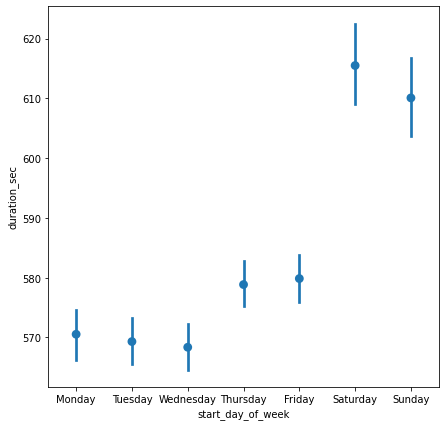

In [130]:
plt.figure(figsize=[7,7])
sb.pointplot(data=bike_data_analysis, x='start_day_of_week', y='duration_sec',linestyles='')

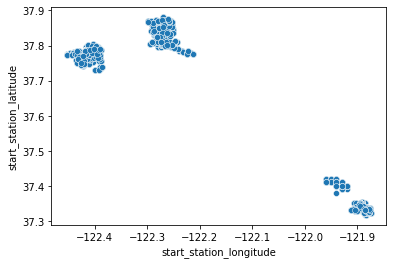

In [131]:
sb.scatterplot(data=bike_data_analysis, y='start_station_latitude', x='start_station_longitude');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

<AxesSubplot:xlabel='start_hour', ylabel='start_day_of_week'>

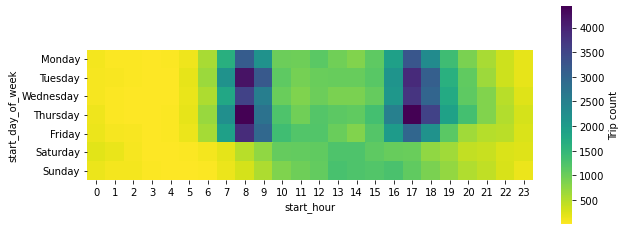

In [139]:
plt.figure(figsize=(10,4))
cat_count = bike_data_analysis.groupby(['start_day_of_week','start_hour']).size()
cat_count = cat_count.reset_index(name='count')
cat_count = cat_count.pivot(index='start_day_of_week', columns='start_hour',values='count')
sb.heatmap(data=cat_count, cbar_kws={'label' : 'Trip count'},square=True,cmap='viridis_r')

<AxesSubplot:xlabel='start_hour', ylabel='start_day_of_week'>

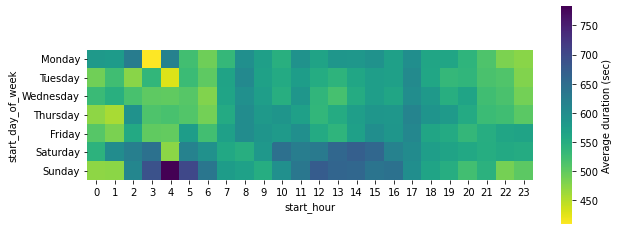

In [147]:
plt.figure(figsize=(10,4))
cat_mean = bike_data_analysis.groupby(['start_day_of_week','start_hour']).mean()['duration_sec']
cat_mean = cat_mean.reset_index()
cat_mean = cat_mean.pivot(index='start_day_of_week', columns='start_hour',values='duration_sec')
sb.heatmap(data=cat_mean, cbar_kws={'label' : 'Average duration (sec)'},square=True,cmap='viridis_r')

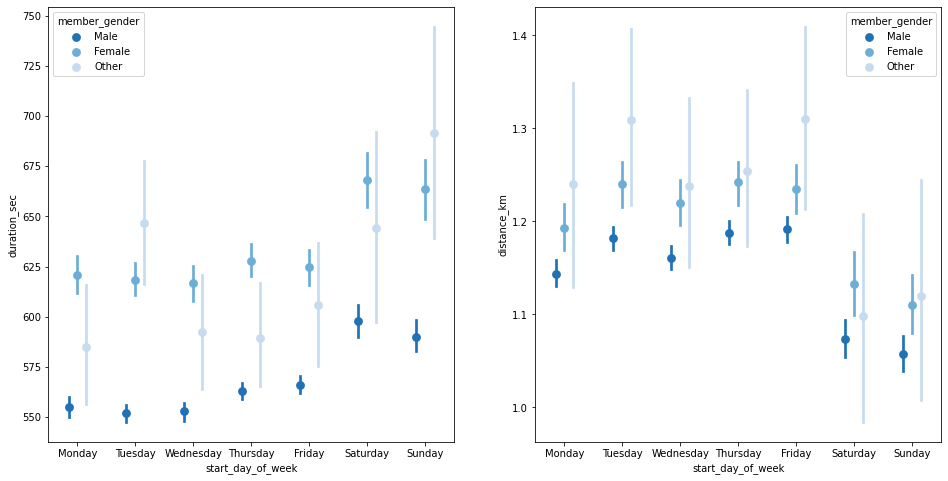

In [133]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sb.pointplot(data=bike_data_analysis,x='start_day_of_week',y='duration_sec',hue='member_gender',
             linestyles=' ', dodge=0.3, palette='Blues_r');
plt.subplot(1,2,2)
sb.pointplot(data=bike_data_analysis,x='start_day_of_week',y='distance_km',hue='member_gender',
             linestyles=' ', dodge=0.3, palette='Blues_r');

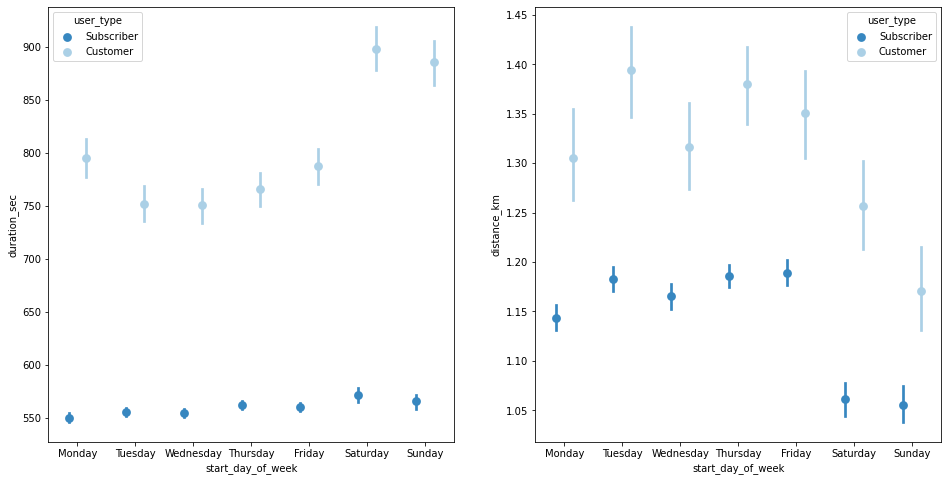

In [134]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sb.pointplot(data=bike_data_analysis,x='start_day_of_week',y='duration_sec',hue='user_type',
             linestyles=' ', dodge=0.3, palette='Blues_r');
plt.subplot(1,2,2)
sb.pointplot(data=bike_data_analysis,x='start_day_of_week',y='distance_km',hue='user_type',
             linestyles=' ', dodge=0.3, palette='Blues_r');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

